# Import Libraries

In [1]:
import math
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

# Solution APIs

In [2]:
# Initializing mediapipe pose class.
mp_pose = mp.solutions.pose

# Setting up the Pose function.
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)

# Initializing mediapipe drawing class, useful for annotation.
mp_drawing = mp.solutions.drawing_utils 

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


# Read Image

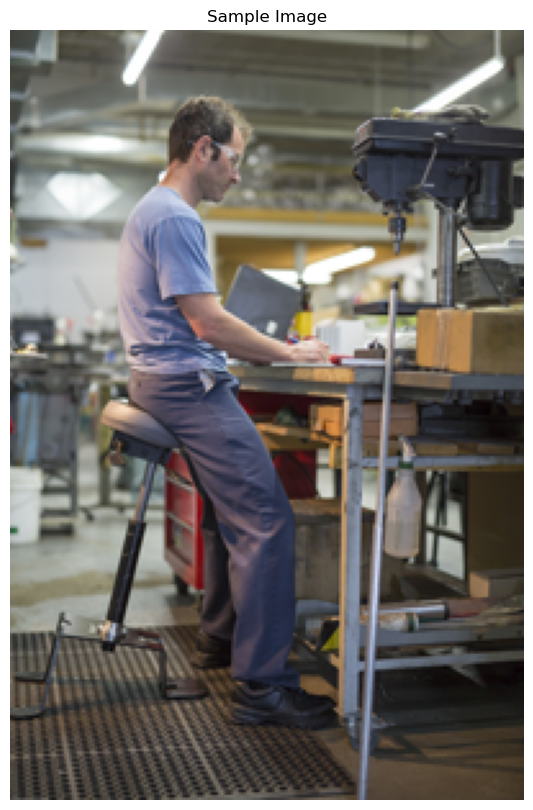

In [4]:
# Read an image from the specified path.
sample_img = cv2.imread('Input/input.png')

# Specify a size of the figure.
plt.figure(figsize = [10, 10])

# props
plt.title("Sample Image")
plt.axis('off')
# Display the sample image, also convert BGR to RGB for display. 
plt.imshow(sample_img[:,:,::-1])
plt.show()

# Perform Pose Detection

In [7]:
# Perform pose detection after converting the image into RGB format.
color_sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
results = pose.process(color_sample_img)

# Check if any landmarks are found.
if results.pose_landmarks:
    
    # Iterate two times as we only want to display first two landmarks.
    for i in range(2):
        
        # Display the found normalized landmarks.
        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}') 

NOSE:
x: 0.4344402551651001
y: 0.1857355535030365
z: -0.062495775520801544
visibility: 0.9999721050262451

LEFT_EYE_INNER:
x: 0.43038663268089294
y: 0.16794613003730774
z: -0.04849601909518242
visibility: 0.9999409914016724



In [8]:
# results.pose_landmarks

In [9]:
if results.pose_landmarks:
    
    # Iterate two times as we only want to display first two landmarks.
    for i in range(33):
        
        # Display the found normalized landmarks.
        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}') 

NOSE:
x: 0.4344402551651001
y: 0.1857355535030365
z: -0.062495775520801544
visibility: 0.9999721050262451

LEFT_EYE_INNER:
x: 0.43038663268089294
y: 0.16794613003730774
z: -0.04849601909518242
visibility: 0.9999409914016724

LEFT_EYE:
x: 0.4264609217643738
y: 0.16669872403144836
z: -0.04904212802648544
visibility: 0.999954104423523

LEFT_EYE_OUTER:
x: 0.42203226685523987
y: 0.16512572765350342
z: -0.048814959824085236
visibility: 0.9999459981918335

RIGHT_EYE_INNER:
x: 0.42952853441238403
y: 0.1676311492919922
z: -0.1259516477584839
visibility: 0.9999641180038452

RIGHT_EYE:
x: 0.4251082241535187
y: 0.16622063517570496
z: -0.12663444876670837
visibility: 0.9999830722808838

RIGHT_EYE_OUTER:
x: 0.4197835922241211
y: 0.16437089443206787
z: -0.12682175636291504
visibility: 0.9999816417694092

LEFT_EAR:
x: 0.3849862217903137
y: 0.15947631001472473
z: 0.05654700845479965
visibility: 0.9999644756317139

RIGHT_EAR:
x: 0.38453787565231323
y: 0.16002732515335083
z: -0.29701781272888184
visibili

In [10]:
# Now we will convert the two normalized landmarks displayed above into their original scale by using the width and height of the  image.

In [11]:
# Retrieve the height and width of the sample image.
image_height, image_width, _ = sample_img.shape

# Check if any landmarks are found.
if results.pose_landmarks:
    
    # Iterate two times as we only want to display first two landmark.
    for i in range(33):
        
        # Display the found landmarks after converting them into their original scale.
        print(f'{mp_pose.PoseLandmark(i).name}:') 
        print(f'x: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x * image_width}')
        print(f'y: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y * image_height}')
        print(f'z: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].z * image_width}')
        print(f'visibility: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].visibility}\n')

NOSE:
x: 86.88805103302002
y: 55.72066605091095
z: -12.499155104160309
visibility: 0.9999721050262451

LEFT_EYE_INNER:
x: 86.07732653617859
y: 50.38383901119232
z: -9.699203819036484
visibility: 0.9999409914016724

LEFT_EYE:
x: 85.29218435287476
y: 50.00961720943451
z: -9.808425605297089
visibility: 0.999954104423523

LEFT_EYE_OUTER:
x: 84.40645337104797
y: 49.537718296051025
z: -9.762991964817047
visibility: 0.9999459981918335

RIGHT_EYE_INNER:
x: 85.9057068824768
y: 50.289344787597656
z: -25.190329551696777
visibility: 0.9999641180038452

RIGHT_EYE:
x: 85.02164483070374
y: 49.86619055271149
z: -25.326889753341675
visibility: 0.9999830722808838

RIGHT_EYE_OUTER:
x: 83.95671844482422
y: 49.31126832962036
z: -25.364351272583008
visibility: 0.9999816417694092

LEFT_EAR:
x: 76.99724435806274
y: 47.84289300441742
z: 11.30940169095993
visibility: 0.9999644756317139

RIGHT_EAR:
x: 76.90757513046265
y: 48.00819754600525
z: -59.40356254577637
visibility: 0.999976634979248

MOUTH_LEFT:
x: 83.11

In [12]:
# Now we will draw the detected landmarks on the sample image using the function 

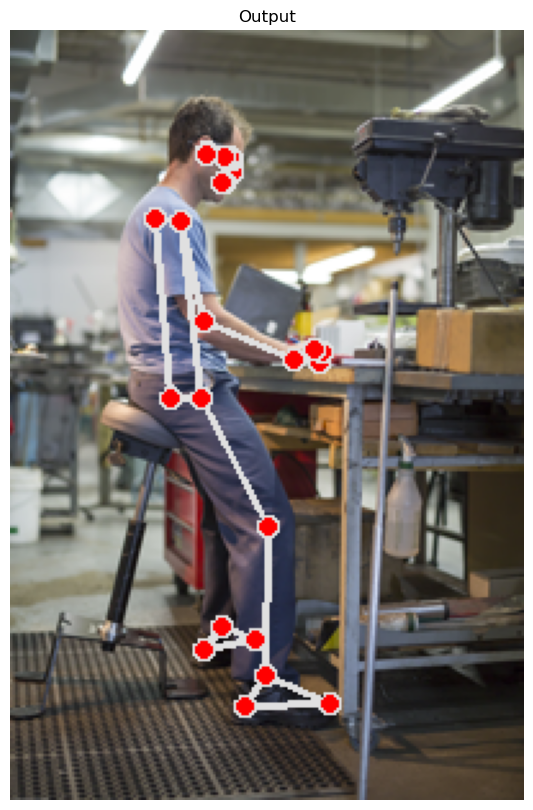

In [13]:
# Create a copy of the sample image to draw landmarks on.
img_copy = sample_img.copy()

# Check if any landmarks are found.
if results.pose_landmarks:
    
    # Draw Pose landmarks on the sample image.
    mp_drawing.draw_landmarks(image=img_copy, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
       
    # Specify a size of the figure.
    fig = plt.figure(figsize = [10, 10])

    # Display the output image with the landmarks drawn, also convert BGR to RGB for display. 
    plt.title("Output")
    plt.axis('off')
    plt.imshow(img_copy[:,:,::-1])
    plt.show()

In [14]:
# Plot Pose landmarks in 3D.

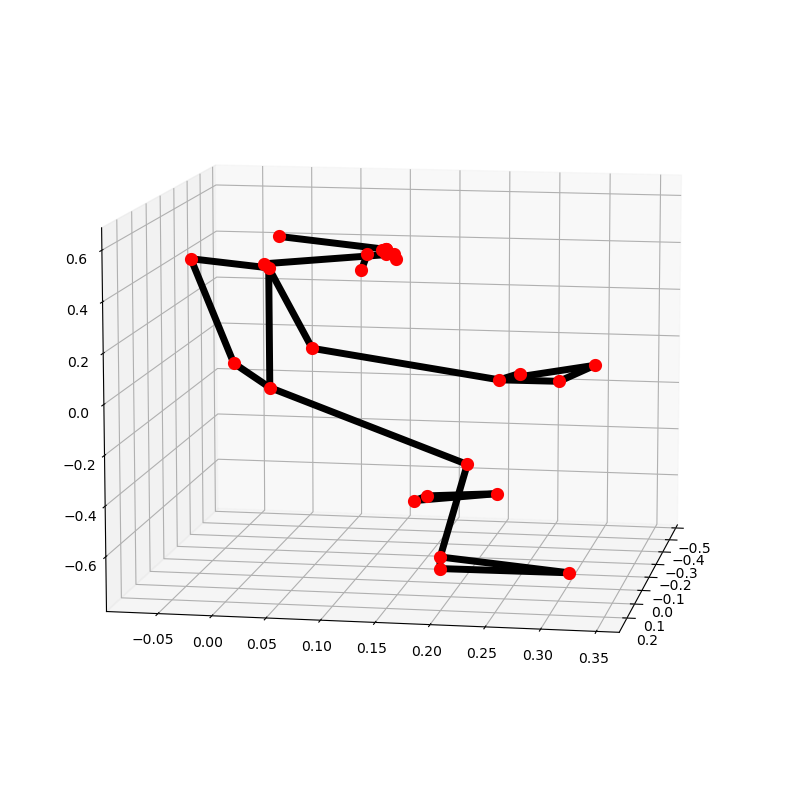

In [15]:
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

<h1><span style="color:red">Writing in a function. </span></h1>

In [3]:
def detectPose(image, pose, display=True):
    '''
    This function performs pose detection on an image.
    Args:
        image: The input image with a prominent person whose pose landmarks needs to be detected.
        pose: The pose setup function required to perform the pose detection.
        display: A boolean value that is if set to true the function displays the original input image, the resultant image, 
                 and the pose landmarks in 3D plot and returns nothing.
    Returns:
        output_image: The input image with the detected pose landmarks drawn.
        landmarks: A list of detected landmarks converted into their original scale.
    '''
    
    # Create a copy of the input image.
    output_image = image.copy()
    
    # Convert the image from BGR into RGB format.
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Perform the Pose Detection.
    results = pose.process(imageRGB)
    
    # Retrieve the height and width of the input image.
    height, width, _ = image.shape
    
    # Initialize a list to store the detected landmarks.
    landmarks = []
    
    # Check if any landmarks are detected.
    if results.pose_landmarks:
    
        # Draw Pose landmarks on the output image.
        mp_drawing.draw_landmarks(image=output_image, landmark_list=results.pose_landmarks,
                                  connections=mp_pose.POSE_CONNECTIONS)
        
        # Iterate over the detected landmarks.
        for landmark in results.pose_landmarks.landmark:
            
            # Append the landmark into the list.
            landmarks.append((int(landmark.x * width), int(landmark.y * height),
                                  (landmark.z * width)))
    
    # Check if the original input image and the resultant image are specified to be displayed.
    if display:
    
        # Display the original input image and the resultant image.
        plt.figure(figsize=[22,22])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
        
        # Also Plot the Pose landmarks in 3D.
        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
        
    # Otherwise
    else:
        
        # Return the output image and the found landmarks.
        return output_image, landmarks

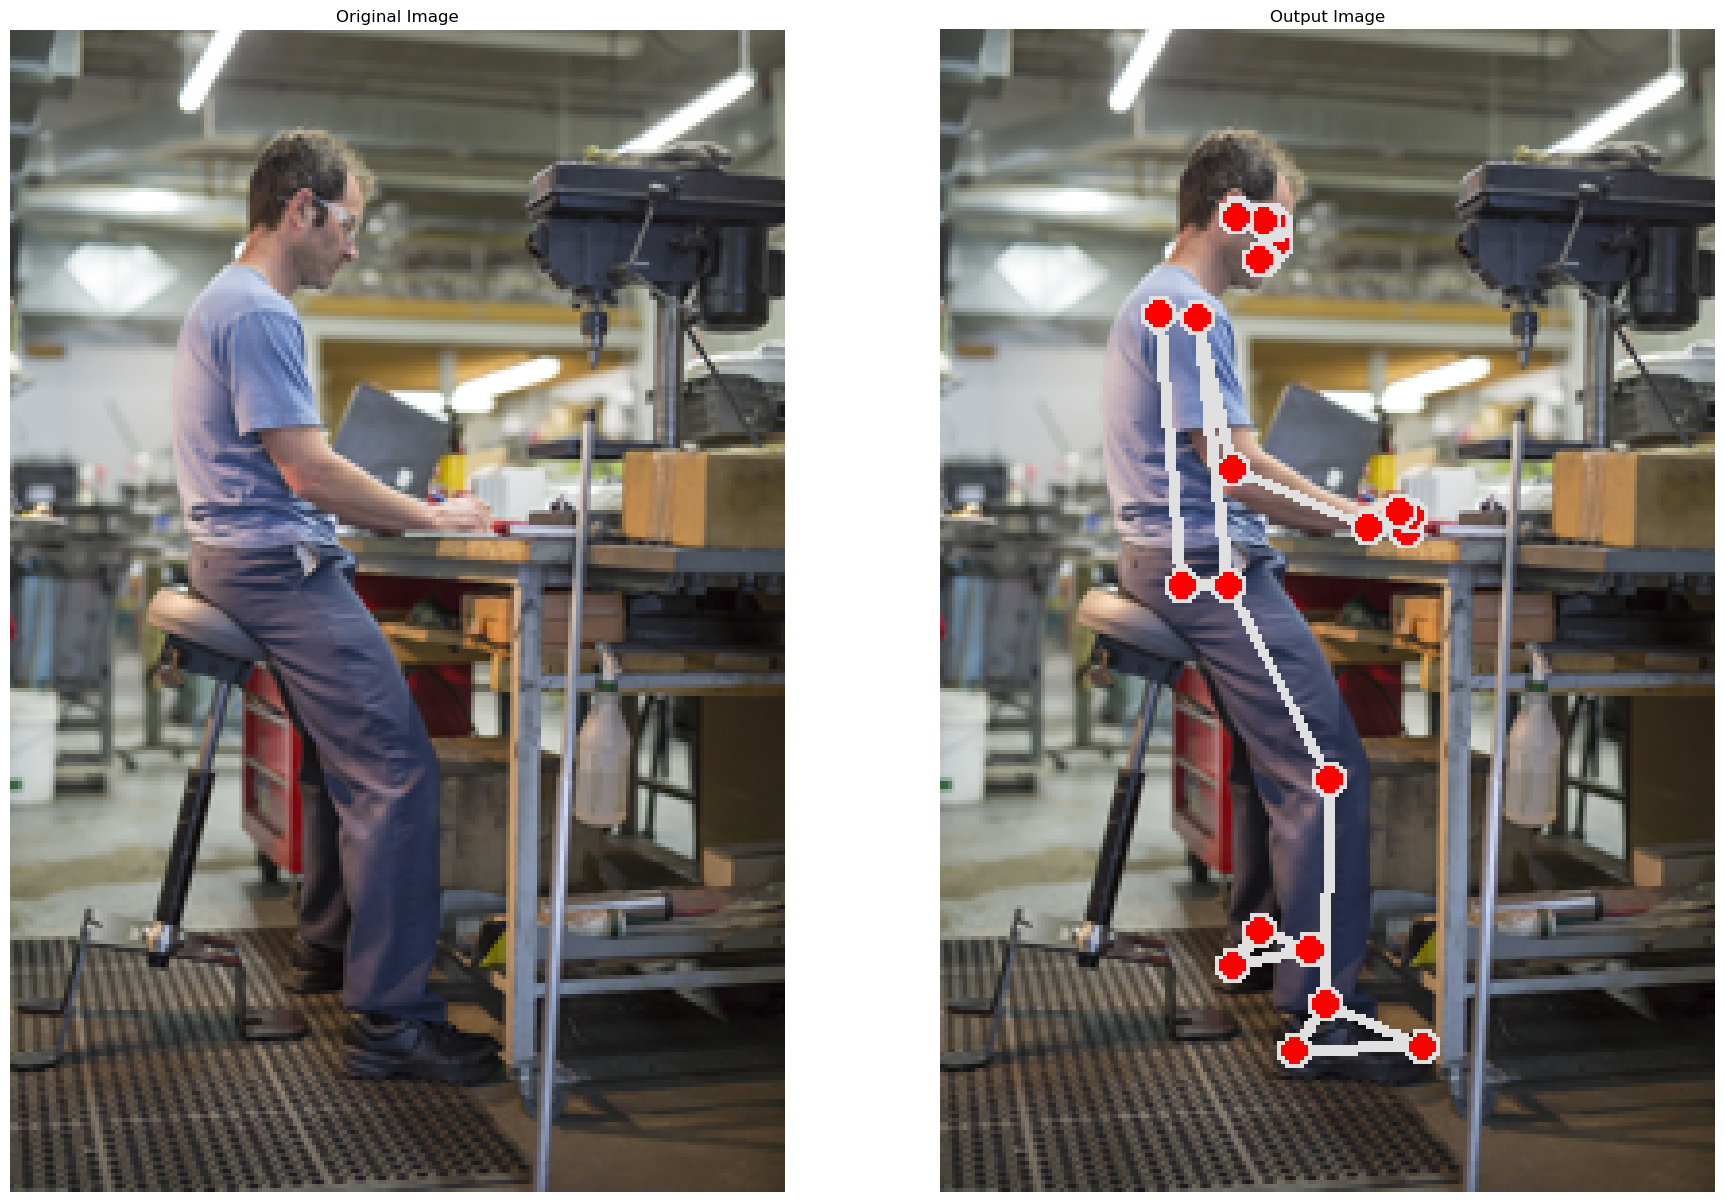

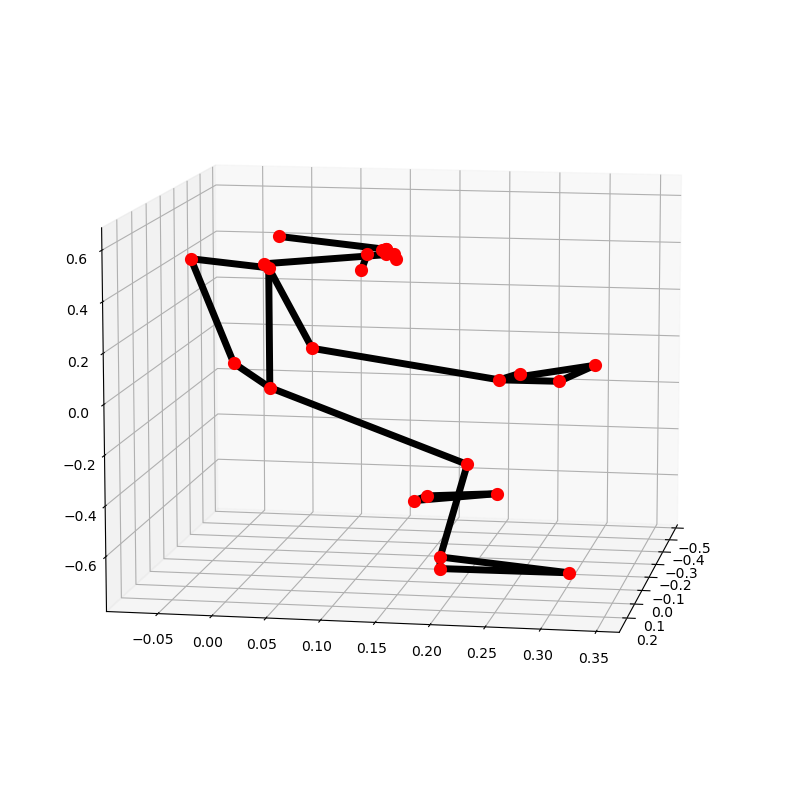

In [17]:
# Read another sample image and perform pose detection on it.
image = cv2.imread('Input/input.png')
detectPose(image, pose, display=True)

<h1><font style="color:rgb(134,19,348)">Pose Detection On Real-Time Webcam Feed/Video</font></h1>

In [30]:
# Setup Pose function for video.
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, model_complexity = 1)

# Initialize the VideoCapture object to read from the webcam.
# video = cv2.VideoCapture(0)

# Create named window for resizing purposes
# cv2.namedWindow('Pose Detection', cv2.WINDOW_NORMAL)


# Initialize the VideoCapture object to read from a video stored in the disk.
video = cv2.VideoCapture('Input/MyMovie1.mp4')

# write to output folder
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
name = "Output/output.mp4"
size = (1137, 640) # this should match exactly to output frame
out = cv2.VideoWriter(name,fourcc, 20, size)

# Set video camera size
video.set(3,1280)
video.set(4,960)

# Initialize a variable to store the time of the previous frame.
time1 = 0

# Iterate until the video is accessed successfully.
while video.isOpened():
    
    # Read a frame.
    ok, frame = video.read()
    
    # Check if frame is not read properly.
    if not ok:
        break

    
    # Flip the frame horizontally for natural (selfie-view) visualization.
    # frame = cv2.flip(frame, 1)
    
    # Get the width and height of the frame
    frame_height, frame_width, _ =  frame.shape
    
    # Resize the frame while keeping the aspect ratio.
    frame = cv2.resize(frame, (int(frame_width * (640 / frame_height)), 640))
    
    # Perform Pose landmark detection.
    frame, _ = detectPose(frame, pose_video, display=False)
    
    # Set the time for this frame to the current time.
    time2 = time()
    
    # Check if the difference between the previous and this frame time > 0 to avoid division by zero.
    if (time2 - time1) > 0:
    
        # Calculate the number of frames per second.
        frames_per_second = 1.0 / (time2 - time1)
        
        # Write the calculated number of frames per second on the frame. 
        cv2.putText(frame, 'FPS: {}'.format(int(frames_per_second)), (10, 30),cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 3)
    
    # Update the previous frame time to this frame time.
    # As this frame will become previous frame in next iteration.
    time1 = time2
    
    # Display the frame.
    cv2.imshow('Pose Detection', frame)
    out.write(frame)
    
    # Wait until a key is pressed.
    # Retreive the ASCII code of the key pressed
    k = cv2.waitKey(1) & 0xFF
    
    # Check if 'ESC' is pressed.
    if(k == 27):
        
        break

# Release the VideoCapture object.
video.release()
out.release()


# Close the windows.
cv2.destroyAllWindows()
cv2.waitKey(1)

-1